<a href="https://colab.research.google.com/github/BalusuDivya/Blood-cells-WBC-detection-using-image-processing/blob/main/BloodCellsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

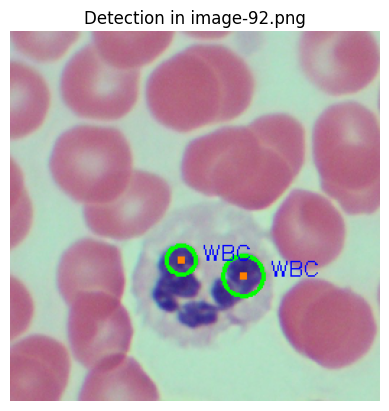

Total number of cells detected in the image: 2
All radii of detected cells: [14, 10]
All X coordinates of detected cells: [161, 118]
All Y coordinates of detected cells: [169, 158]


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random

# Set the path to the dataset folder
dataset_path = '/content/drive/MyDrive/images'  # Using raw string notation

# Get a list of all image files in the dataset folder
image_files = [filename for filename in os.listdir(dataset_path) if filename.endswith(('.png', '.jpg'))]

# Randomly select one image from the dataset
selected_image_file = random.choice(image_files)
file_path = os.path.join(dataset_path, selected_image_file)

# Read the enhanced image
img = cv2.imread(file_path, 0)

# Morphological operations
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Adaptive thresholding on mean and gaussian filter
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Otsu's thresholding
ret4, th4 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Initialize lists for the selected image
cell_count, x_count, y_count = [], [], []

# Read the original image to display circle and center detection
display = cv2.imread(file_path)

# Hough transform with modified circular parameters
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.2, 20, param1=50, param2=28, minRadius=1, maxRadius=20)

# Circle detection and labeling using Hough transformation
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    for (x, y, r) in circles:
        cv2.circle(display, (x, y), r, (0, 255, 0), 2)  # Draw the circle
        cv2.rectangle(display, (x - 2, y - 2), (x + 2, y + 2), (0, 128, 255), -1)  # Draw the center
        cv2.putText(display, 'WBC', (x + r + 5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)  # Add WBC text
        cell_count.append(r)
        x_count.append(x)
        y_count.append(y)

# Convert the image from BGR to RGB for displaying with matplotlib
display_rgb = cv2.cvtColor(display, cv2.COLOR_BGR2RGB)

# Display the output image
plt.imshow(display_rgb)
plt.axis('off')  # Hide axes
plt.title(f'Detection in {selected_image_file}')
plt.show()  # Show the image

# Print results for the selected image
detected_cell_count = len(cell_count)
print("Total number of cells detected in the image:", detected_cell_count)
print("All radii of detected cells:", cell_count)
print("All X coordinates of detected cells:", x_count)
print("All Y coordinates of detected cells:", y_count)